In [3]:
import geopandas as gpd
from libpysal.weights.contiguity import Queen
from libpysal import examples
import geopandas as gpd
from esda.moran import (Moran, Moran_BV,Moran_Local, Moran_Local_BV)
from splot.esda import moran_scatterplot

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight');

In [3]:
gdf = gpd.read_file("gemeente_2021_v2.shp")
gdf.head()

NameError: name 'gpd' is not defined

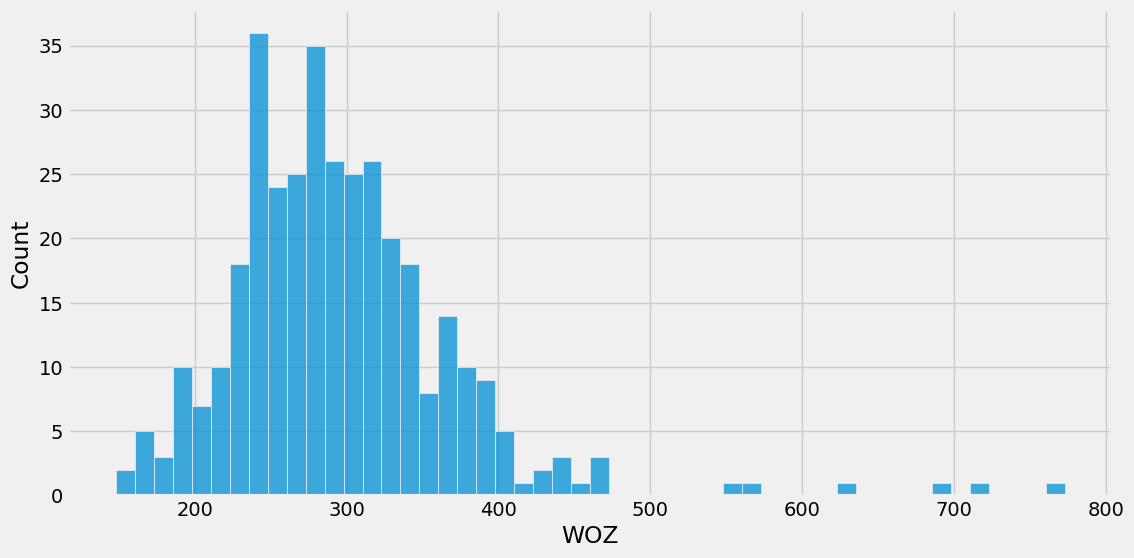

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.histplot(gdf["WOZ"], bins=50, ax=ax);

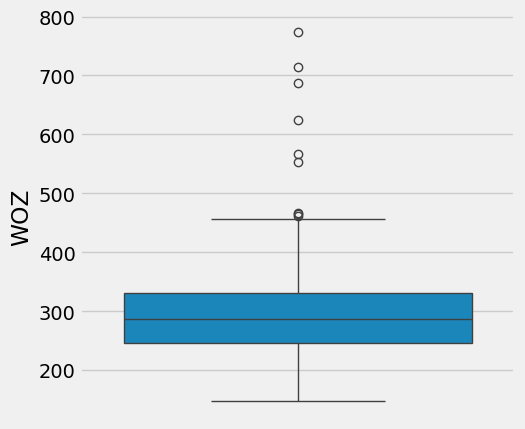

In [16]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.boxplot(gdf["WOZ"], ax=ax);

## Applying Moran I on vector data

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

Load data and calculate weights

In [5]:
# guerry = examples.load_example('gemeente_2021_v2.shp')
# link_to_data = guerry.get_path('guerry.shp')
gdf = gpd.read_file("gemeente_2021_v2.shp")
x = gdf['P_HUURWON'].values
y = gdf['WOZ'].values
w = Queen.from_dataframe(gdf, use_index=False)
w.transform = 'r'

('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')


/home/saheel/Downloads/ex_data/env/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 2 islands with ids: 6, 135.
  W.__init__(self, neighbors, ids=ids, **kw)


## Assessing Global Spatial Autocorrelation

In [6]:
from esda.moran import Moran

moran = Moran(y, w)
moran.I

np.float64(0.5129237914515228)

In [7]:
from splot.esda import moran_scatterplot

Our value for the statistic is interpreted against a reference distribution under the null hypothesis of complete spatial randomness. PySAL uses the approach of random spatial permutations.

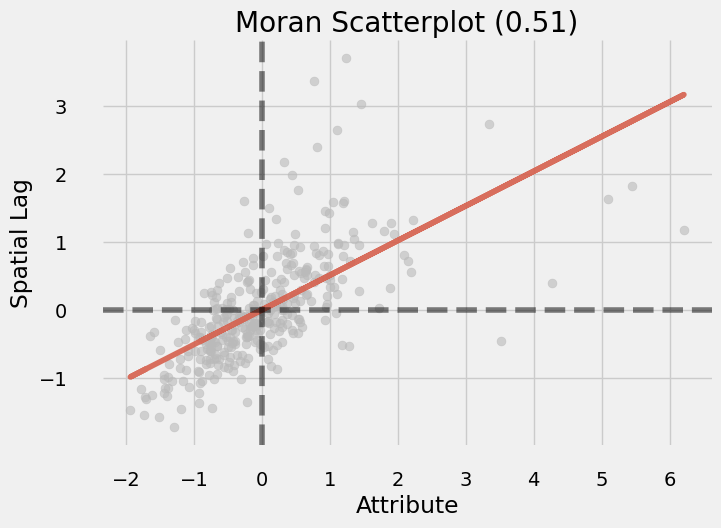

In [12]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

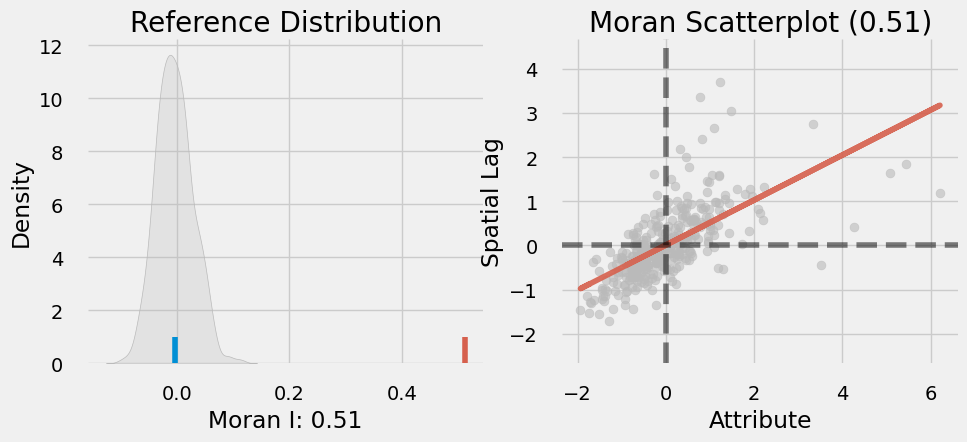

In [13]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

(P<0.05) Our observed value is statistically significant, we can reject the null hypothesis

In [14]:
moran.p_sim

np.float64(0.001)

## Visualizing Local Autocorrelation with splot - Hot Spots, Cold Spots and Spatial Outliers

In addition to visualizing Global autocorrelation statistics, splot has options to visualize local autocorrelation statistics. We compute the local Moran m. Then, we plot the spatial lag and the Donatns variable in a Moran Scatterplot.

/home/saheel/Downloads/ex_data/env/lib/python3.12/site-packages/esda/moran.py:1084: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


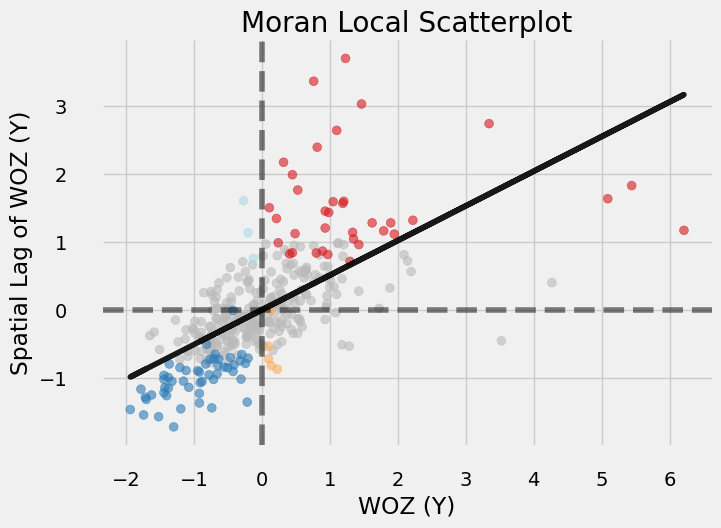

In [16]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc, p=0.05, zstandard=True)
ax.set_xlabel('WOZ (Y)')
ax.set_ylabel('Spatial Lag of WOZ (Y)')
plt.show()


We can distinguish the specific type of local spatial autocorrelation in High-High, Low-Low, High-Low, Low-High. Where the upper right quadrant displays HH, the lower left, LL, the upper left LH and the lower left HL.

These types of local spatial autocorrelation describe similarities or dissimilarities between a specific polygon with its neighboring polygons. The upper left quadrant for example indicates that polygons with low values are surrounded by polygons with high values (LH). The lower right quadrant shows polygons with high values surrounded by neighbors with low values (HL). This indicates an association of dissimilar values.

Let's now visualize the areas we found to be significant on a map:


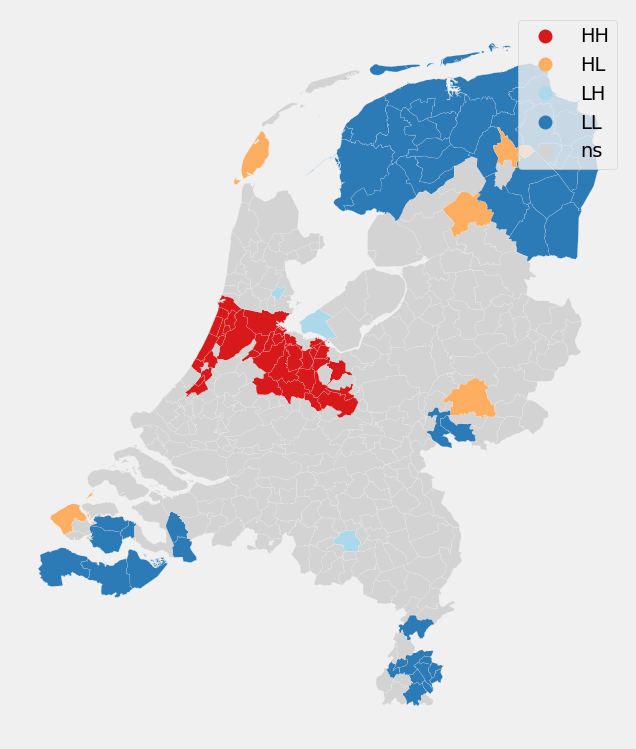

In [17]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.show()

## Combined visualizations

Often, it is easier to asses once statistical results or interpret these results comparing different visualizations. Here we for example look at a static visualization of a Moran Scatterplot, LISA cluster map and choropleth map.

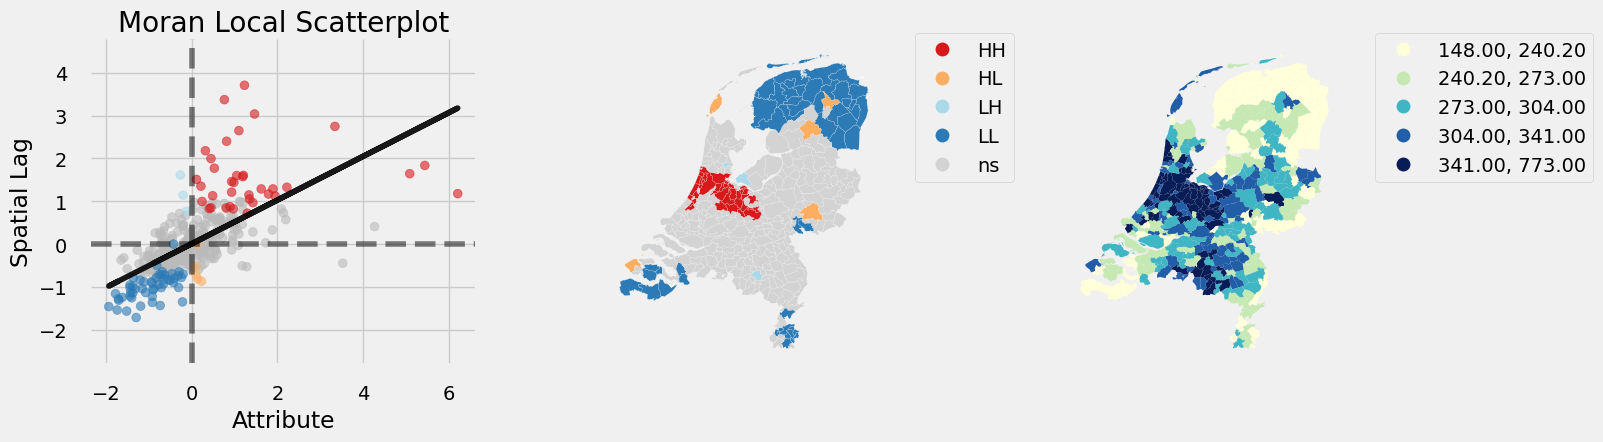

In [20]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'WOZ')
plt.show()

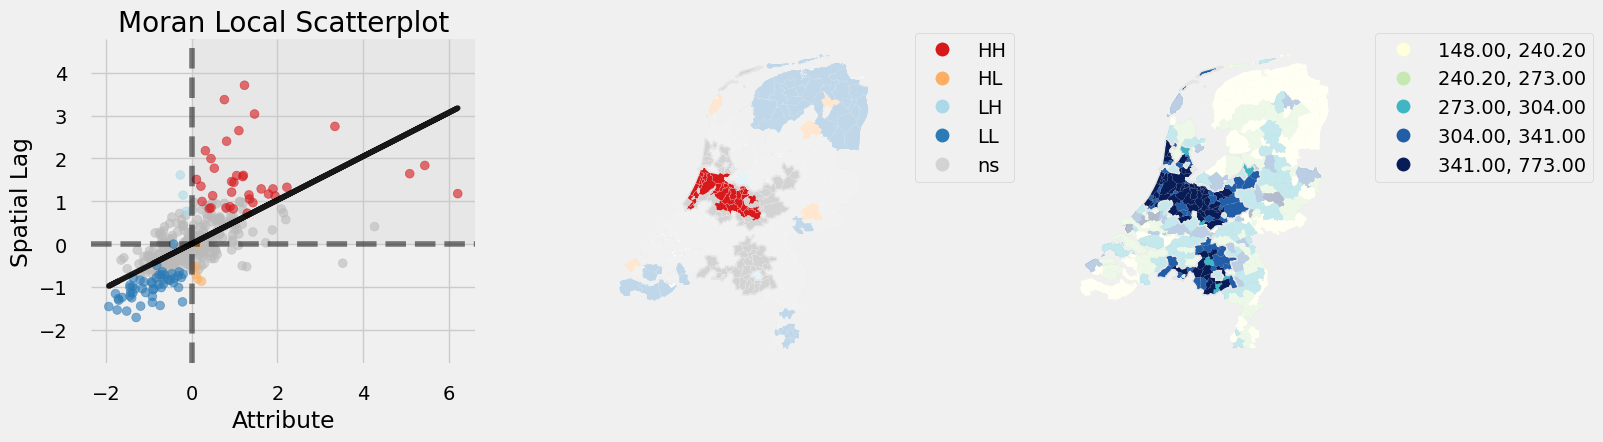

In [21]:
plot_local_autocorrelation(moran_loc, gdf, 'WOZ', quadrant=1)
plt.show()


## Bivariate Moran Statistics

Additionally, to assessing the correlation of one variable over space. It is possible to inspect the relationwhip of two variables and their position in space with so called Bivariate Moran Statistics. These can be found in `esda.moran.Moran_BV`.

In [22]:
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

Next to y we will also be looking at the `P_HUURWON` (The percentage of rental residences) x.

In [23]:
x = gdf['P_HUURWON'].values

Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:

In [24]:
moran = Moran(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

/home/saheel/Downloads/ex_data/env/lib/python3.12/site-packages/esda/moran.py:1084: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/home/saheel/Downloads/ex_data/env/lib/python3.12/site-packages/esda/moran.py:1426: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


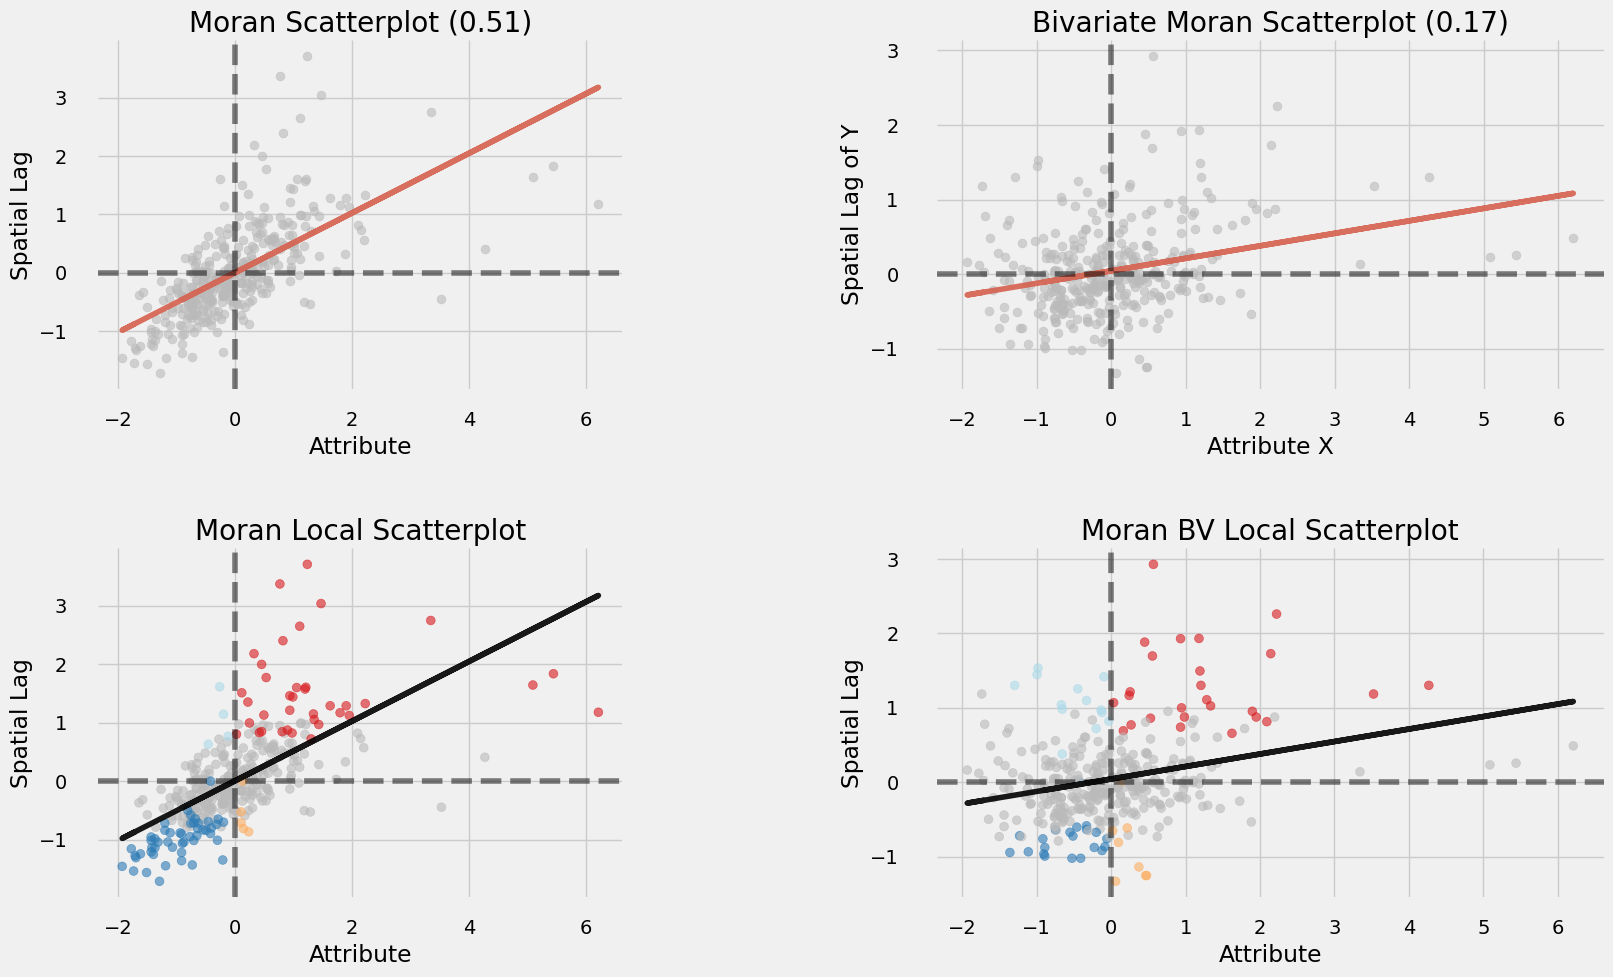

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(18,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
fig.tight_layout(h_pad=3, w_pad=3)
plt.show()

As you can see an easy moran_scatterplot call provides you with loads of options. Now what are Bivariate Moran Statistics?

Bivariate Moran Statistics describe the correlation between one variable and the spatial lag of another variable. Therefore, we have to be careful interpreting our results. Bivariate Moran Statistics do not take the inherent correlation between the two variables at the same location into account. They much more offer a tool to measure the degree one polygon with a specific attribute is correlated with its neighboring polygons with a different attribute.

splot can offer help interpreting the results by providing visualizations of reference distributions and a Moran Scatterplot:

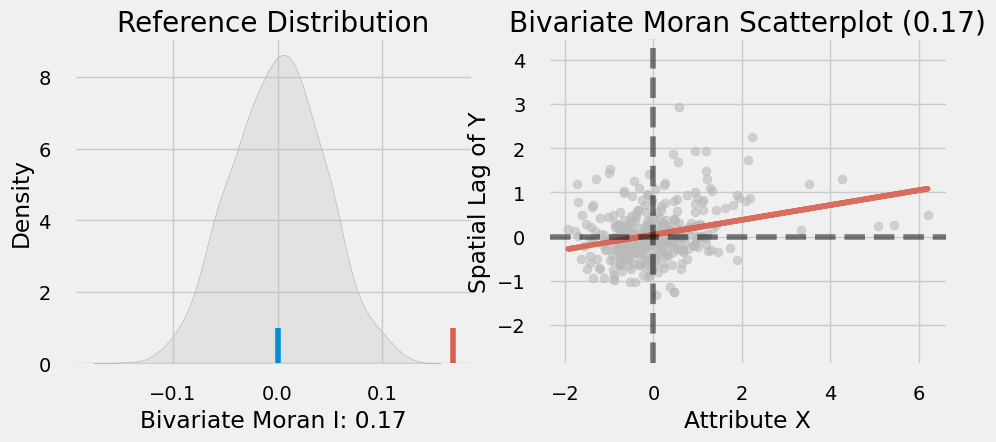

In [30]:
plot_moran_bv(moran_bv)
plt.show()

## Local Bivariate Moran Statistics

Similar to univariate local Moran statistics pysal and splot offer tools to asses local autocorrelation for bivariate analysis:

In [ ]:
from esda.moran import Moran_Local_BV

/home/saheel/Downloads/ex_data/env/lib/python3.12/site-packages/esda/moran.py:1426: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


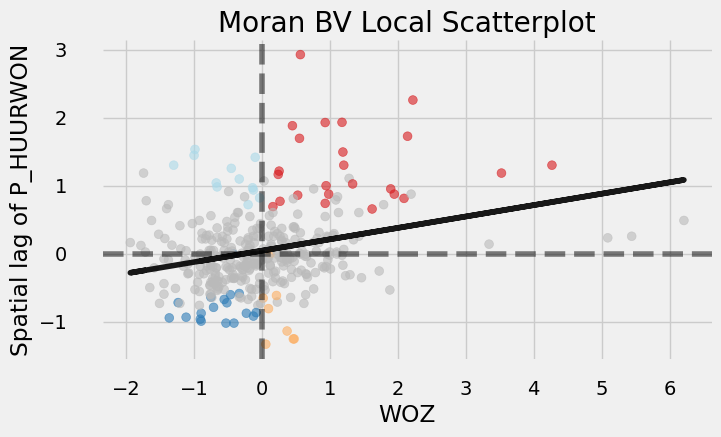

In [32]:
moran_loc_bv = Moran_Local_BV(y, x, w)
fig, ax = moran_scatterplot(moran_loc_bv, p=0.05)
ax.set_xlabel('WOZ')
ax.set_ylabel('Spatial lag of P_HUURWON')
plt.show()

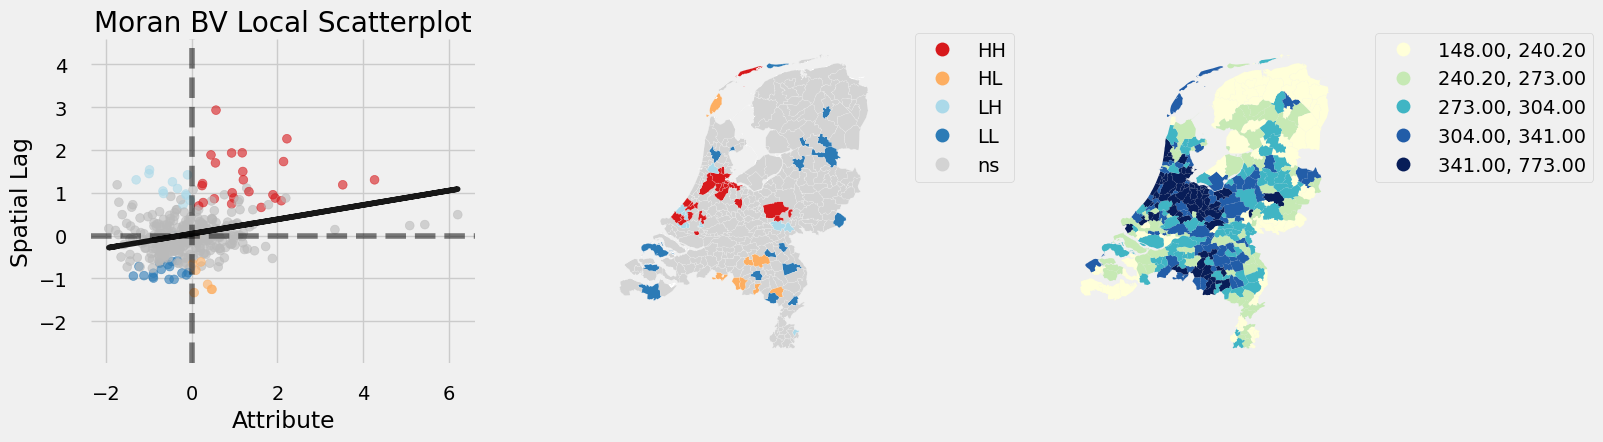

In [33]:
plot_local_autocorrelation(moran_loc_bv, gdf, 'WOZ')
plt.show()

Text(0.5, 1.0, "Chess Distribution\nexpected Moran's I: -1")

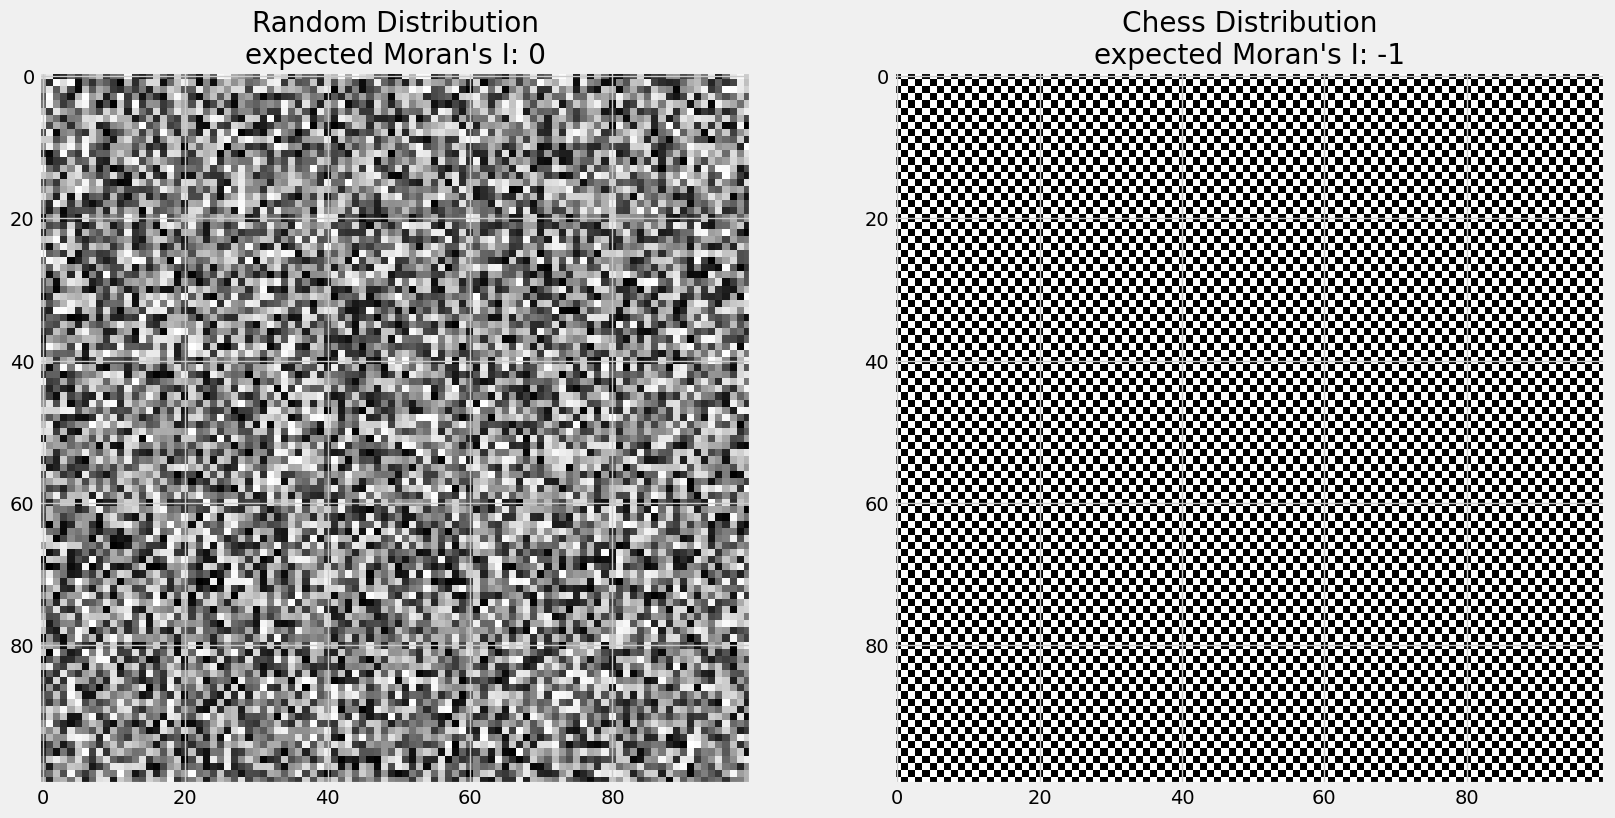

In [43]:
from skimage.io import imread

fig, axs = plt.subplots(1, 2, figsize=(18,10),
                        subplot_kw={'aspect': 'equal'})
raster_image_random = imread(r'random.tif')
raster_image_chess = imread(r'chess.tif')
axs[0].imshow(raster_image_random)
axs[0].set_title("Random Distribution\nexpected Moran's I: 0")
axs[1].imshow(raster_image_chess)
axs[1].set_title("Chess Distribution\nexpected Moran's I: -1")

In [54]:
from libpysal.weights import lat2W
from esda.moran import Moran
from skimage.color import rgb2gray
from splot.esda import moran_scatterplot

def Morans_I(data):
    """transforming RGB data to grayscale"""
    data_gray = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140])
    col,row = data_gray.shape[:2]
    WeightMatrix= lat2W(row,col)
    WeightMatrix = lat2W(data_gray.shape[0],data_gray.shape[1])
    MoranM= Moran(data_gray,WeightMatrix)
    fig, ax = moran_scatterplot(MoranM, aspect_equal=True)

    print("Raster Dimensions:\t" + str(data_gray.shape))
    print("Moran's I Value:\t" +str(round(MoranM.I,4)))
    print("Moran's P Value:\t" +str(round(MoranM.p_norm,4)))
    plt.show()


Raster Dimensions:	(100, 100)
Moran's I Value:	0.0078
Moran's P Value:	0.2689


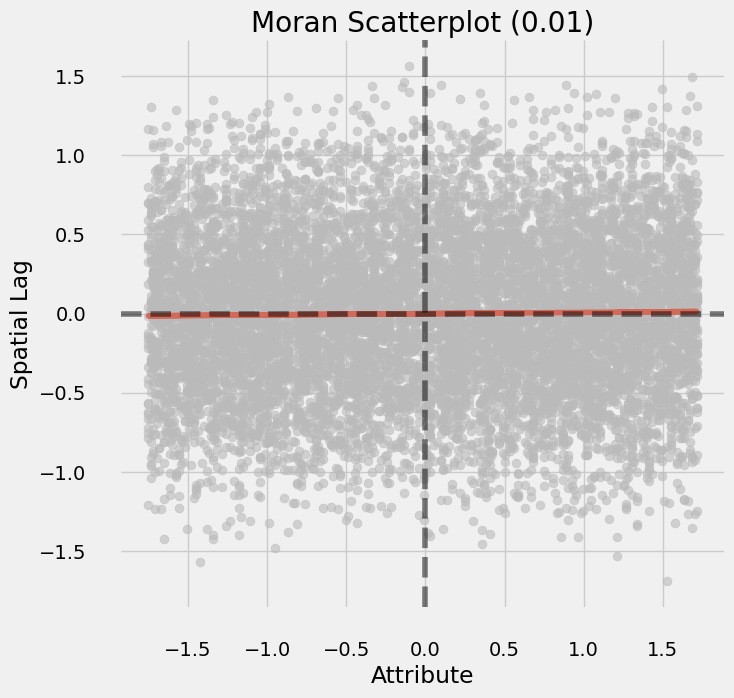

In [55]:
Morans_I(raster_image_random)

## Reference

1. https://pysal.org/esda/generated/esda.Moran.html
2. https://nbviewer.org/github/pysal/splot/blob/main/notebooks/esda_morans_viz.ipynb
3. https://nbviewer.org/github/simon-donike/Morans_I/blob/master/Morans_I.ipynb